
# Programa Ingenia+ Data Science

Recordemos que un proyecto de data science tiene varias etapas:

1. Recolección de Datos
2. Exploración y Procesamiento de los datos
3. Modelado
4. Puesta en Producción

En clases anteriores, trabajamos con el dataset `StudentPerformace`. Pudimos observar el tipo de datos que teniamos y le hiciemos algunas transformaciones.

Llego la hora de utilizar los conceptos de aprendizaje supervisado para hacer predicciones sobre alguna variable en el dataset.

Para poder ajustar modelos de Machine Learning, la herramienta más sencilla y más utilizada es `scikit-learn`. Esta librería es muy utilizada ya que contiene funciones desarrolladas para la mayoría de los modelos de machine learning. Además `Scikit-learn` tienen una amplia y muy buena [documentación](https://scikit-learn.org/stable/).

<font size=5> 🚀 👩🏽‍💻 Machine Learning: Aprendizaje Supervisado 📣</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [ ]:
import os

In [ ]:
os.getcwd()

'/content'

Primero, vamos a leer los datos limpios y procesados.

In [ ]:
# Leemos nuevamente los datos de los estudiantes
students = pd.read_csv('estudiantes_limpio.csv')

In [ ]:
students.head()

,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,english score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,1,1,1,72.0,72,74,73.0,1,0,0,1,0,0,0,0
1,2,1,0,69.0,90,88,89.0,1,0,0,0,0,0,1,0
2,1,1,1,90.0,95,93,94.0,1,0,0,0,0,1,0,0
3,0,0,1,47.0,57,44,50.5,0,1,1,0,0,0,0,0
4,2,1,1,76.0,78,75,76.5,0,1,0,0,0,0,1,0


Antes que nada, chequeemos nuevamente que eliminamos todos los valores faltantes.

In [ ]:
students.isnull().sum()

,0
race/ethnicity,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0
english score,0
female,0
male,0
associate's degree,0


Ahora tenemos que decidir que variable o variables vamos a predecir. Esto quiere decir que tenemos que elegir cual va a ser la variable que al predecirla conteste la pregunta que nos hicimos de los datos.

Lo que queremos saber es:

1. ¿Qué puntaje final obtendra un estudiante?
2. Dado un estudiante, ¿aprobara o no el examen?

**_¿Qué tipo de problemas estamos tratando de resolver?_**

Para contestar estas preguntas vamos a obtener dos nuevas variables:

1. El puntaje final: Lo obtendremos promediando los tres puntajes (matematica, lectura y escritura)
2. Aprobado: Una etiqueta que me permita saber si cada estudiante del dataset aprobo el examen (puntaje final >= 60) o no lo aprobo (puntaje final < 60).

In [ ]:
students['puntaje_final'] = (students['math score'] + students['reading score'] + students['writing score']) / 3

## 📈 Regresión

Comenzaremos contestando la pregunta 1. Este problema es un problema de regresión (_¿Por qué?_)

### Seleccion de target (y) y variables (X)

Lo primero que haremos, es seleccionar las variables o features que deseemos usar como variable independientes (aquellas que van a explicar mi predicción) y la variable a predecir.

Usaremos todas las variables menos aquellas que fueron usadas para calcular el puntaje final. Debemos también asegurarnos de no incluir las variables a predecir. Como variable a predecir usaremos el puntaje final.

In [ ]:
# Elimino aquellas variables que no quiero incluir en el modelo y las guardo en x.
x = students.drop(['math score', 'reading score', 'writing score', 'english score', 'puntaje_final'],
                  axis=1)

In [ ]:
x.head()

,race/ethnicity,lunch,test preparation course,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,1,1,1,1,0,0,1,0,0,0,0
1,2,1,0,1,0,0,0,0,0,1,0
2,1,1,1,1,0,0,0,0,1,0,0
3,0,0,1,0,1,1,0,0,0,0,0
4,2,1,1,0,1,0,0,0,0,1,0


In [ ]:
lista_atributos = x.columns

In [ ]:
# Ahora selecciono las etiquetas y las guardo en y.
y = students['puntaje_final']

In [ ]:
x, y = np.array(x), np.array(y)

In [ ]:
x

array([[1, 1, 1, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [3, 1, 0, ..., 0, 1, 0],
       [3, 0, 1, ..., 0, 1, 0]])

In [ ]:
y[:10]

array([72.66666667, 82.33333333, 92.66666667, 49.33333333, 76.33333333,
       77.33333333, 91.66666667, 40.66666667, 65.        , 49.33333333])

### Separando Train / Test

Ahora tenemos que separar el dataset en conjuntos de entrenamiento (X_train, y_train) y de testeo (X_test, y_test) usando la función train_test_split de scikit-learn.

¿Por qué separamos el dataset? Porque es necesario entrenar el modelo con un set de datos. El modelo no puede ver los datos de evaluación cuando se esta entrenando!

La forma en que se dividen los datos normalmente es 80% entrenamiento -20% evaluación)

In [ ]:
# Importamos la librearia para separar el dataset.
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)

#test_size=0.2 significa que el 20% de los datos se reservarán para test, y el 80% se usará para entrenar el modelo.

#es lo que asegura que la división se mantenga igual cada vez que ejecutes el código, lo que hace que los resultados sean reproducibles.

#si pongo random 7 p.e Usa una aleatoriedad diferente que random_state=42,
#pero si volvés a correrlo con random_state=7, obtendrás los mismos subconjuntos de train y test cada vez.

Lo que hace exactamente es:
Toma tus datos completos (x y y).

x: son las variables independientes (features).

y: es la variable dependiente o etiqueta (target).

Baraja aleatoriamente los datos (usando el random_state=42 para que sea reproducible).

Divide los datos en dos partes:

Un 80% para entrenamiento (X_train, y_train)

Un 20% para prueba/test (X_test, y_test)



In [ ]:
x.shape

(1000, 11)

In [ ]:
X_train.shape

(800, 11)

In [ ]:
X_test.shape

(200, 11)

### Random Forest

Recordemos que Random Forest es un algoritmo de ensamble. Hay dos tecnicas para esto: Bagging y Boosting.

El objetivo de bagging es entrenar distintos modelos, donde cada uno vea distintas porciones del set de entrenamiento. Random Forest, además de aplicar Bagging, también selecciona features al azar, de esa manera descorrelaciona aún más los distintos modelos de árbol creados.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
# Inicializo el modelo
regresor = RandomForestRegressor(criterion='mae', random_state=42)

In [ ]:
# Inicializo el modelo
regresor = RandomForestRegressor(criterion='absolute_error', random_state=42)

# Entreno el modelo
regresor.fit(X_train, y_train);

In [ ]:
regresor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Ahora evaluaremos el modelo (Profundizaremos este concepto más adelante). Primero, hacemos predicciones para el set de evaluación y luego lo comparamos con los valores reales.

In [ ]:
# Predigo los valores para el set de testeo
y_pred = regresor.predict(X_test)

In [ ]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred)

11.390941666666668

### Support Vector Machine

Recordemos que el SVM es un algortimo que establece un hiperplano que separa los puntos maximizando el margen. A su vez, una de sus ventajas es la aplicación de Kernels que me permite ajustar mejor el modelo.


In [ ]:
from sklearn.svm import SVR

In [ ]:
# Inicializo el modelo
regresor_svr = SVR(C=1.0, epsilon=0.2)

In [ ]:
# Entreno el modelo
regresor_svr.fit(X_train, y_train);

In [ ]:
regresor_svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Ahora evaluaremos el modelo (Profundizaremos este concepto más adelante). Primero, hacemos predicciones para el set de evaluación y luego lo comparamos con los valores reales.

In [ ]:
# Predigo los valores para el set de testeo
y_pred_svr = regresor_svr.predict(X_test)

In [ ]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred_svr)

10.610220119303728

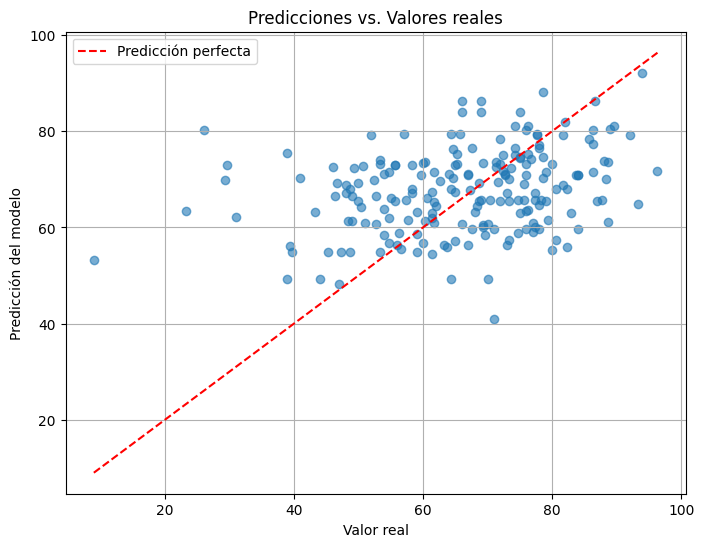

In [ ]:
# Crear DataFrame con resultados reales y predicciones
resultados = pd.DataFrame({
    'Real': y_test,
    'Predicción': y_pred
})

plt.figure(figsize=(8,6))
plt.scatter(resultados['Real'], resultados['Predicción'], alpha=0.6)
plt.plot([resultados['Real'].min(), resultados['Real'].max()],
         [resultados['Real'].min(), resultados['Real'].max()],
         'r--', label='Predicción perfecta')
plt.xlabel('Valor real')
plt.ylabel('Predicción del modelo')
plt.title('Predicciones vs. Valores reales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# prompt: Guardar csv modificado

# Assuming 'students' is the DataFrame you want to save
students.to_csv('estudiantes_con_puntaje_final.csv', index=False)

# To download the file to your local machine:
from google.colab import files
files.download('estudiantes_con_puntaje_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>